In [6]:
from utils import *
warnings.filterwarnings('ignore')
%matplotlib inline


In [7]:
from tkinter.filedialog import askopenfilename
import tkinter
from torchvision.io import read_image


In [8]:
fd_collection = getCollection("team_5_mwdb_phase_2", "fd_collection")


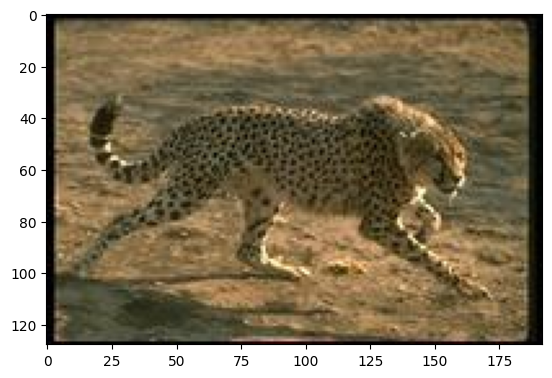

Showing 10 similar labels for image ID 880, using pearson_distance_measure for fc_fd feature descriptor...


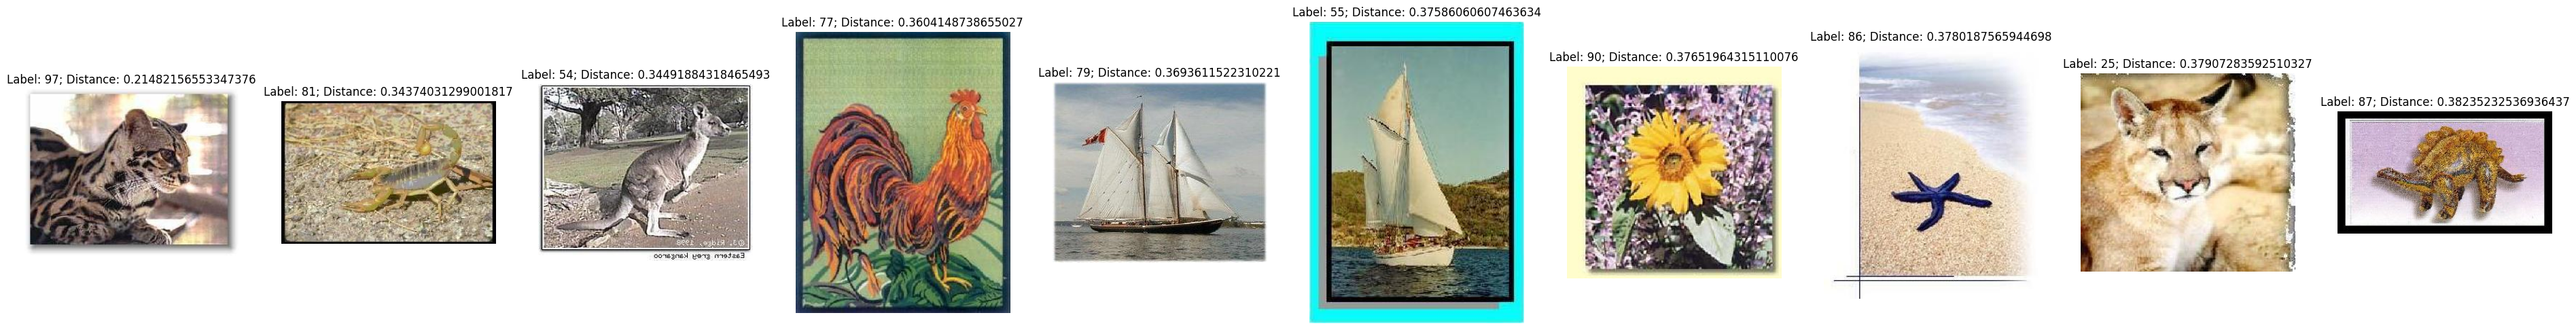

In [9]:
selected_image_id = int(
    input("Enter image ID: (-1 if you want to select an image file)")
)
if selected_image_id == -1:
    # pick image and get label using tkinter
    root = tkinter.Tk()
    root.attributes("-topmost", True)
    selected_image_path = askopenfilename(title="Select Image File")
    root.withdraw()
    print(selected_image_path)
    sample_image = read_image(selected_image_path).div(255)  # scale to [0,1] range
    sample_label = int(input("Enter image label number: (0 to 100)"))
else:
    # get image and label from dataset
    sample_image, sample_label = dataset[selected_image_id]

# Show selected image
plt.imshow(transforms.ToPILImage()(sample_image))
plt.show()

k = int(input("Enter value of k: "))
if k < 1:
    raise ValueError("k should be a positive integer")

selected_feature_model = valid_feature_models[
    str(input("Enter feature model - one of " + str(list(valid_feature_models.keys()))))
]

selected_distance_measure = feature_distance_matches[selected_feature_model]

if selected_image_id == -1:
    show_similar_labels_for_image(
        fd_collection,
        -1,
        sample_image,
        sample_label,
        k,
        selected_feature_model,
        selected_distance_measure,
        save_plots=False,
    )
else:
    show_similar_labels_for_image(
        fd_collection,
        selected_image_id,
        None,
        None,
        k,
        selected_feature_model,
        selected_distance_measure,
        save_plots=False,
    )